# PREDIKSI GAGAL JANTUNG MENGGUNAKAN ALGORITMA SUPPORT VECTOR MACHINE

### Memanggil Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

### Melakukan pemanggilan dan inisialiasi dataset

In [2]:
dataset=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data=dataset

### Menampilkan 5 baris pertama pada dataset

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,label
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Menampilkan informasi jenis data pada dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  label                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Menampilkan jumlah data dengan label 0 dan 1 pada dataset menggunakan barplot

[Text(0, 0, '203'), Text(0, 0, '96')]

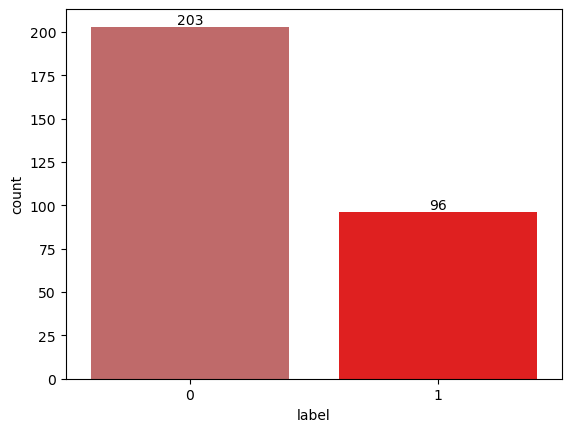

In [5]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data["label"], palette= cols)
ax.bar_label(ax.containers[0])

### Melakukan data split

In [7]:
X=data.drop(columns='label',axis=1)
y=data['label']

In [8]:
print(X)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [10]:
print(X.shape,X_train.shape,X_test.shape)

(299, 12) (239, 12) (60, 12)


### Melakukan training pada data latih menggunakan algoritma SVM

In [11]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

### Menampilkan hasil akurasi data latih

In [12]:
X_train_predict=model.predict(X_train)
train_data_accuracy=accuracy_score(X_train_predict,y_train)
print('Akurasi Data Latih : ',train_data_accuracy)

Akurasi Data Latih :  0.8242677824267782


### Menampilkan hasil akurasi data uji

In [13]:
X_test_predict=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_predict,y_test)
print('Akurasi Data Test : ',test_data_accuracy)

Akurasi Data Test :  0.7833333333333333


### Membuat model prediksi

In [14]:
input_data=[[75,0,582,0,20,1,265000,1.9,130,1,0,4]]

prediction=model.predict(input_data)
print(prediction)

if(prediction==0):
  print('Pasien Relatif Tidak Beresiko')
else:
  print('Pasien Beresiko Gagal Jantung')

[1]
Pasien Beresiko Gagal Jantung


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Menyimpan model yang sudah dibuat

In [15]:
filename='heartfailure-model.sav'
pickle.dump(model,open(filename,'wb'))